# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [3]:
vegetables = pd.read_csv('Jalore.csv')
vegetables.head()
len(vegetables)

91

# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [4]:
vegetables = vegetables[vegetables['District Name'] == "Jalore"]
vegetables = vegetables[vegetables['Market Name'] == "Jalore"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Jalore,Jalore,Garlic,Other,FAQ,14000,15000,14500,28-Dec-19
1,2,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,21-Nov-19
2,3,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,20-Nov-19
3,4,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,19-Nov-19
4,5,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5750,08-Sep-19


In [19]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,10,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5800,31
8,9,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5700,1
7,8,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5600,5
6,7,Jalore,Jalore,Garlic,Other,FAQ,5000,5500,5300,6
5,6,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5800,7
4,5,Jalore,Jalore,Garlic,Other,FAQ,5500,6000,5750,8
3,4,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,19
2,3,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,20
1,2,Jalore,Jalore,Garlic,Other,FAQ,140,150,145,21
0,1,Jalore,Jalore,Garlic,Other,FAQ,14000,15000,14500,28


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [20]:
climate = pd.read_csv('climate_Jalore_270.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity Variety Grade  \
0     81      82        Jalore      Jalore    Garlic   Other   FAQ   
1     80      81        Jalore      Jalore    Garlic   Other   FAQ   
2     79      80        Jalore      Jalore    Garlic   Other   FAQ   
3     78      79        Jalore      Jalore    Garlic   Other   FAQ   
4     77      78        Jalore      Jalore    Garlic   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     1400                     1600   
1                     1200                     1400   
2                     1200                     1400   
3                     1000                     1200   
4                     1300                     1500   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       1500  ...  56.292222  46.422222  66.844444  47.630000   
1                       1300  ...  56.108148  46.418519  68.303704  48.890370   
2    

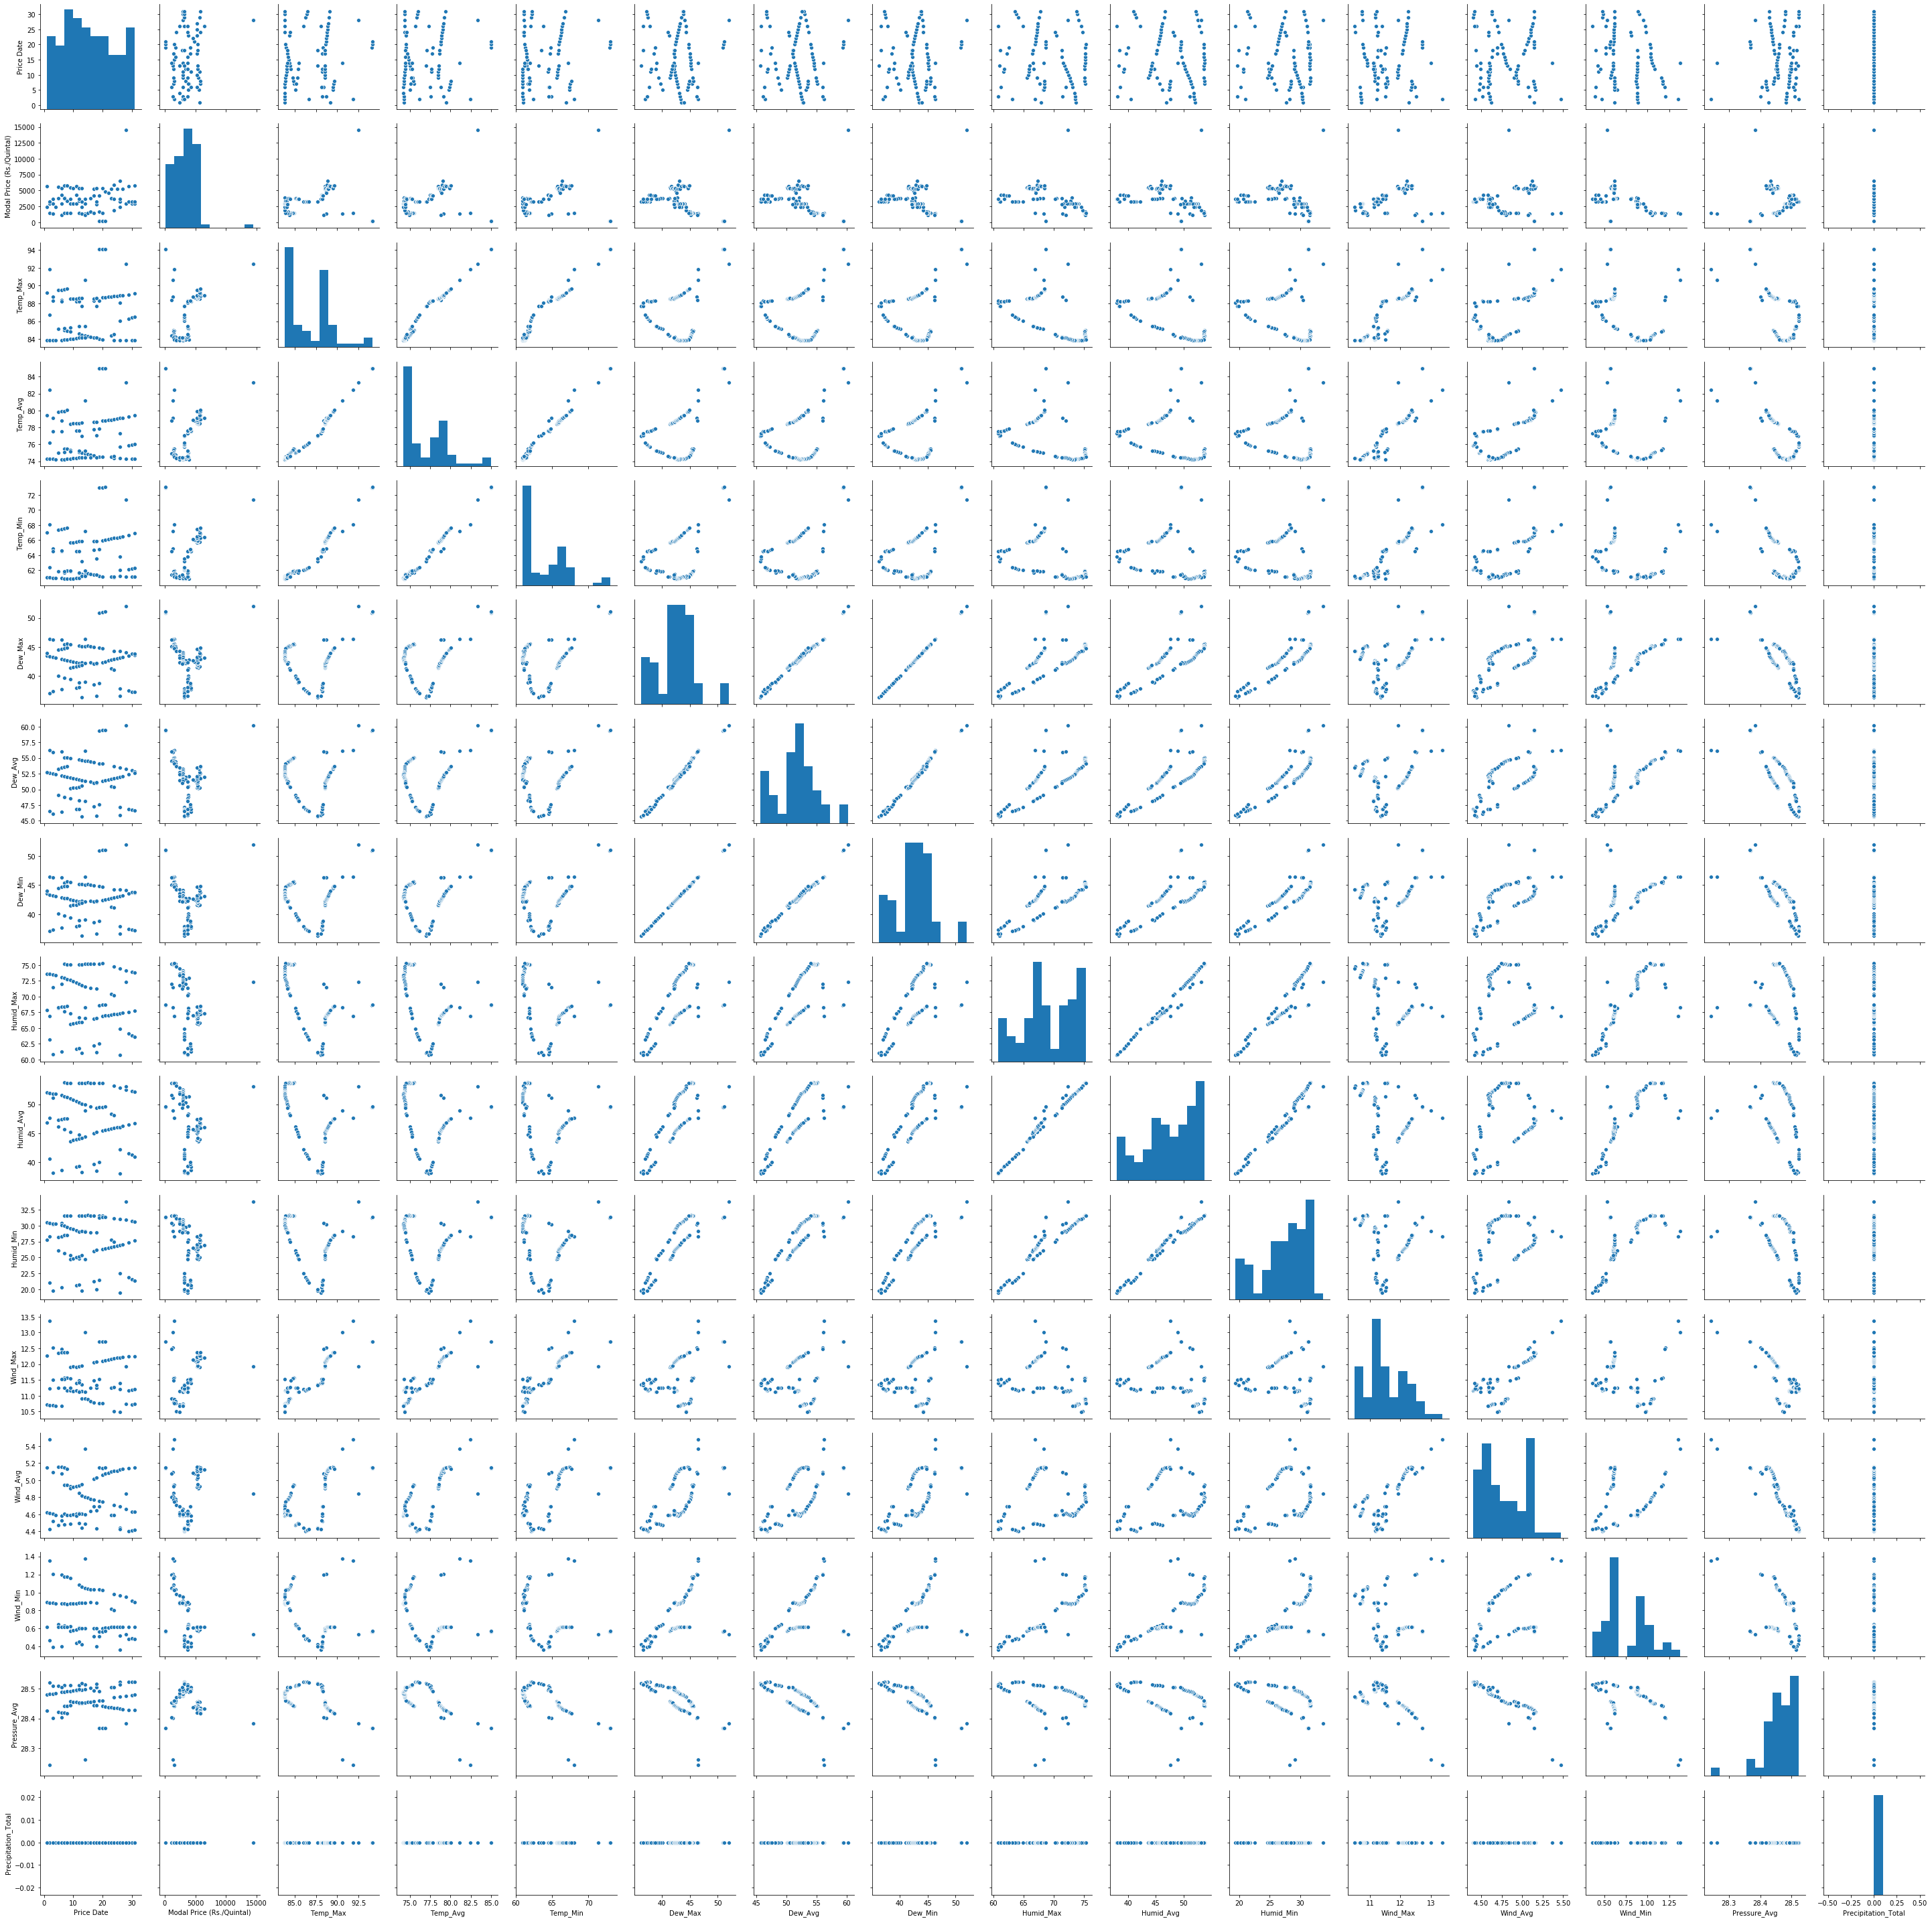

In [21]:
#sns.pairplot(data)

# Data is splitted into train and test set.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [24]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=3000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 2.403339385986328


In [25]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [26]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9876529822345375
0.8786521552790126


# Feature Importance

In [27]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.02131543918305423
Temp_Max -> 0.05470629258293891
Temp_Avg -> 0.05168494888260602
Temp_Min -> 0.15691505203866843
Dew_Max -> 0.040974476500065395
Dew_Avg -> 0.16993371720674152
Dew_Min -> 0.03979318516694692
Humid_Max -> 0.01893835836711966
Humid_Avg -> 0.08670728385036715
Humid_Min -> 0.08508639440666071
Wind_Max -> 0.09712898181504755
Wind_Avg -> 0.0518804804412882
Wind_Min -> 0.04201118052747584
Pressure_Avg -> 0.08292420903101932
Precipitation_Total -> 0.0


In [28]:
'''import pickle
with open("Karad_learn_max", "rb") as f:
    rf = pickle.load(f)
rf.predict()

print(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))
print(predicted, y_test)
'''

'import pickle\nwith open("Karad_learn_max", "rb") as f:\n    rf = pickle.load(f)\nrf.predict()\n\nprint(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))\nprint(predicted, y_test)\n'

In [29]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

2920.6->3400
3310.01->1500
2674.9->2900
2907.8->2400
2826.1->2900
3007.3->2900
1532.0->1500
6126.315->5250
1373.795->1400
1650.145->1400
3533.8->3700
3266.6->3750
5316.435->5850
3701.515->3800
5948.115->5250
3212.1->3200
5558.92->5700
5338.775->5250
4158.45->4200
3590.45->3700
1456.9->1100
5087.565->4850
1410.395->1500
3385.25->3200
3259.2->2800


In [30]:
print(sum_a/l)

323.5806
